In [2]:
import data_utils as dutils
import model_utils as mutils
import numpy as np
import torch
import distributions as distr
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

/Users/user1/Documents/code/OBED/data_utils.py:386: UserWarning: Eventually need to adjust d_border.
  warnings.warn('Eventually need to adjust d_border.')


------- Iteration 1/4 -------


100%|██████████| 100/100 [00:02<00:00, 46.53it/s]


Executed design; best_eig: 8.669171333312988, design_params: {'slope': tensor(0.), 'intercept': tensor(-0.6378)}
{'slope': tensor(0.), 'intercept': tensor(-0.6378)}
1/500: elbo = -1952.611572
51/500: elbo = -920.897827
101/500: elbo = -560.660034
151/500: elbo = -469.980743
201/500: elbo = -273.239044
251/500: elbo = -228.182709
301/500: elbo = -240.258820
351/500: elbo = -208.910904
401/500: elbo = -204.911911
451/500: elbo = -187.310135
thetas_MAP: tensor([[ 1.2321,  1.8905, -0.7064]], grad_fn=<ViewBackward0>)


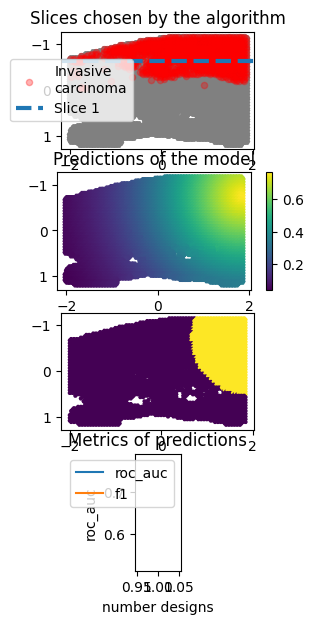

------- Iteration 2/4 -------


100%|██████████| 100/100 [00:03<00:00, 31.46it/s]


Executed design; best_eig: 4.942249774932861, design_params: {'slope': tensor(8.7423e-08), 'intercept': tensor(0.9158)}
{'slope': tensor(0.), 'intercept': tensor(-0.6378)}
{'slope': tensor(8.7423e-08), 'intercept': tensor(0.9158)}
1/500: elbo = -328.719849
51/500: elbo = -87.516045
101/500: elbo = -60.829895
151/500: elbo = -49.216995
201/500: elbo = -32.513988
251/500: elbo = -29.156715
301/500: elbo = -28.580936
351/500: elbo = -17.220190
401/500: elbo = -13.007720
451/500: elbo = -11.710512
thetas_MAP: tensor([[ 0.2695,  2.8651, -1.4985]], grad_fn=<ViewBackward0>)


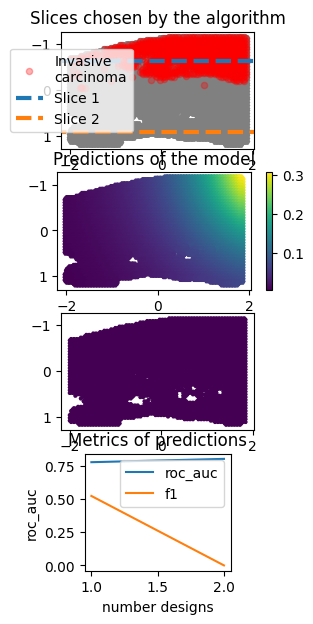

------- Iteration 3/4 -------


100%|██████████| 100/100 [00:03<00:00, 33.14it/s]


Executed design; best_eig: 7.6852240562438965, design_params: {'slope': tensor(0.8391), 'intercept': tensor(0.3979)}
{'slope': tensor(0.), 'intercept': tensor(-0.6378)}
{'slope': tensor(8.7423e-08), 'intercept': tensor(0.9158)}
{'slope': tensor(0.8391), 'intercept': tensor(0.3979)}
1/500: elbo = -80.551865
51/500: elbo = -67.768997
101/500: elbo = -57.180954
151/500: elbo = -52.939453
201/500: elbo = -49.684040
251/500: elbo = -48.597656
301/500: elbo = -41.519032
351/500: elbo = -51.908974
401/500: elbo = -42.705276
451/500: elbo = -44.807869
thetas_MAP: tensor([[ 0.0167,  0.9062, -2.9752]], grad_fn=<ViewBackward0>)


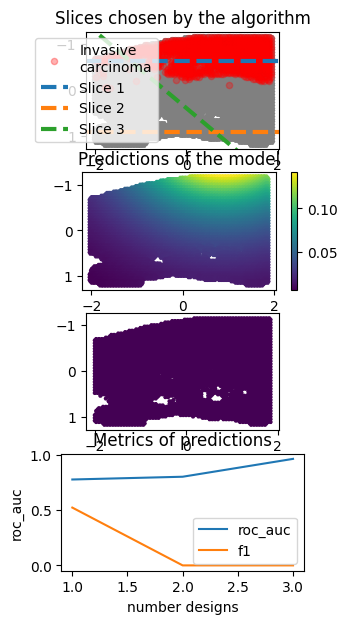

------- Iteration 4/4 -------


100%|██████████| 100/100 [00:02<00:00, 33.69it/s]


Executed design; best_eig: 4.2344889640808105, design_params: {'slope': tensor(0.3640), 'intercept': tensor(-0.1200)}
{'slope': tensor(0.), 'intercept': tensor(-0.6378)}
{'slope': tensor(8.7423e-08), 'intercept': tensor(0.9158)}
{'slope': tensor(0.8391), 'intercept': tensor(0.3979)}
{'slope': tensor(0.3640), 'intercept': tensor(-0.1200)}
1/500: elbo = -77.990364
51/500: elbo = -73.683441
101/500: elbo = -50.892666
151/500: elbo = -53.606319
201/500: elbo = -49.071217
251/500: elbo = -45.206619
301/500: elbo = -44.813961
351/500: elbo = -44.139011
401/500: elbo = -44.049809
451/500: elbo = -42.777817
thetas_MAP: tensor([[ 0.0127, -2.5072, -3.6140]], grad_fn=<ViewBackward0>)


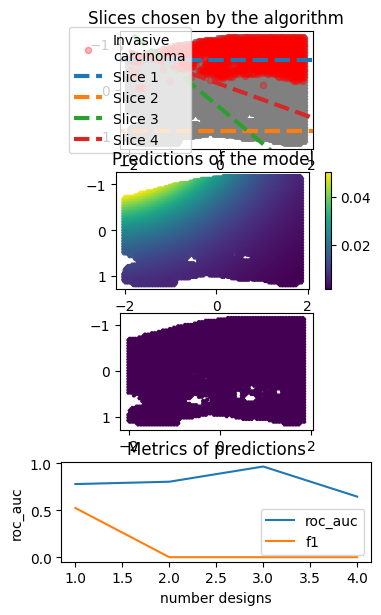

In [4]:
# discrete 

# data
datamodule = dutils.Prostate_cancer_2d()
X,y = datamodule.get_data(processed=True)
slice_radius_pixel = 2
slice_radius = slice_radius_pixel / datamodule.norm_params['std_both']
tissue = dutils.Tissue_discrete(X, y, slice_radius = slice_radius)
torch.autograd.set_detect_anomaly(True)

# distributions
r_prior = torch.tensor([1.0])
mu = torch.tensor([torch.log(r_prior),0.,0.])
std = torch.tensor([1.,10.,10.])
prior = distr.Circle_prior_log(mu=mu,log_std=torch.log(std))
predictive = distr.Circle_predictive()

# optimization
eig_method = mutils.eig_NMC
eig_optim_method = mutils.eig_discrete_optim
n_designs = 4
optim_args = {}

# execution
experiment, thetas_MAP, metric_values, metric_names = mutils.OED_fit(
    tissue, prior,predictive,n_designs,eig_method,eig_optim_method,
    n_steps_varinf=500,
    print_every=50,
    optim_args=optim_args
)

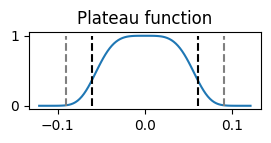

------- Iteration 1/4 -------
1/500, eig: 0.723845899105072
51/500, eig: 0.7993378639221191
101/500, eig: 0.8078863620758057
151/500, eig: 0.7696835994720459
201/500, eig: 0.6938441395759583
251/500, eig: 0.6474519371986389
301/500, eig: 0.880832850933075
351/500, eig: 0.8841495513916016
401/500, eig: 0.7245854735374451
451/500, eig: 0.6998342871665955
Executed design; best_eig: 0.7770052552223206, design_params: {'slope': tensor(-0.0962, requires_grad=True), 'intercept': tensor(0.0387, requires_grad=True)}
{'slope': tensor(-0.0962), 'intercept': tensor(0.0387)}
1/500: elbo = -10.787228
51/500: elbo = -0.889760
101/500: elbo = -7.643245
151/500: elbo = -0.857865
201/500: elbo = -2.234930
251/500: elbo = -0.963358
301/500: elbo = -2.742989
351/500: elbo = -2.468637
401/500: elbo = -1.404738
451/500: elbo = -1.675990
thetas_MAP: tensor([[-0.6245,  0.1044,  0.0887]], grad_fn=<ViewBackward0>)


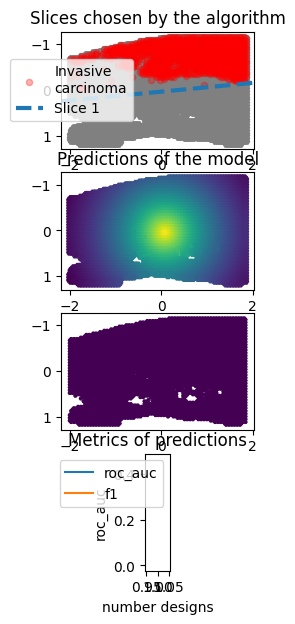

------- Iteration 2/4 -------
1/500, eig: 0.06682127714157104
51/500, eig: 0.29724034667015076
101/500, eig: 0.27012771368026733
151/500, eig: 0.2595759332180023
201/500, eig: 0.18441513180732727
251/500, eig: 0.2074253261089325
301/500, eig: 0.2439495474100113
351/500, eig: 0.2569780945777893
401/500, eig: 0.14950008690357208
451/500, eig: 0.25128114223480225
Executed design; best_eig: 0.22661951184272766, design_params: {'slope': tensor(-0.0967, requires_grad=True), 'intercept': tensor(0.0156, requires_grad=True)}
{'slope': tensor(-0.0962), 'intercept': tensor(0.0387)}
{'slope': tensor(-0.0967), 'intercept': tensor(0.0156)}
1/500: elbo = -1756.010010
51/500: elbo = -1333.043457
101/500: elbo = -841.009827
151/500: elbo = -475.249023
201/500: elbo = -389.320587
251/500: elbo = -355.825073
301/500: elbo = -321.641724
351/500: elbo = -311.766235
401/500: elbo = -297.493988
451/500: elbo = -289.606750
thetas_MAP: tensor([[ 0.0247,  1.6782, -0.1833]], grad_fn=<ViewBackward0>)


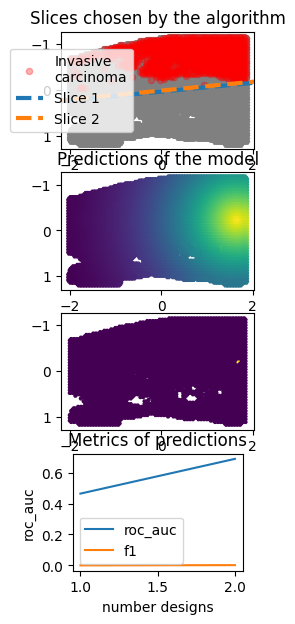

------- Iteration 3/4 -------
1/500, eig: 1.8327702283859253
51/500, eig: 1.8954304456710815
101/500, eig: 1.9336901903152466
151/500, eig: 1.8535873889923096
201/500, eig: 1.8430334329605103
251/500, eig: 1.9854743480682373
301/500, eig: 1.9203475713729858
351/500, eig: 1.9443655014038086
401/500, eig: 1.8223495483398438
451/500, eig: 1.9287678003311157
Executed design; best_eig: 1.9937164783477783, design_params: {'slope': tensor(-0.0666, requires_grad=True), 'intercept': tensor(0.0270, requires_grad=True)}
{'slope': tensor(-0.0962), 'intercept': tensor(0.0387)}
{'slope': tensor(-0.0967), 'intercept': tensor(0.0156)}
{'slope': tensor(-0.0666), 'intercept': tensor(0.0270)}
1/500: elbo = -167.151016
51/500: elbo = -94.850494
101/500: elbo = -38.875469
151/500: elbo = -32.422741
201/500: elbo = -24.610592
251/500: elbo = -25.196922
301/500: elbo = -14.697521
351/500: elbo = -19.975245
401/500: elbo = -15.635164
451/500: elbo = -12.948300
thetas_MAP: tensor([[-0.7421,  2.5178, -0.4277]],

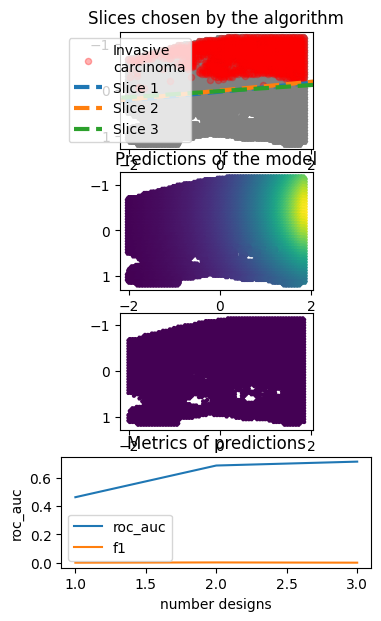

------- Iteration 4/4 -------
1/500, eig: 0.4501376748085022
51/500, eig: 0.6414088606834412
101/500, eig: 0.491875559091568
151/500, eig: 0.36061468720436096
201/500, eig: 0.5694800019264221
251/500, eig: 0.5765664577484131
301/500, eig: 0.5745566487312317
351/500, eig: 0.48597773909568787
401/500, eig: 0.5290284752845764
451/500, eig: 0.49206435680389404
Executed design; best_eig: 0.4723532497882843, design_params: {'slope': tensor(-0.0672, requires_grad=True), 'intercept': tensor(0.0328, requires_grad=True)}
{'slope': tensor(-0.0962), 'intercept': tensor(0.0387)}
{'slope': tensor(-0.0967), 'intercept': tensor(0.0156)}
{'slope': tensor(-0.0666), 'intercept': tensor(0.0270)}
{'slope': tensor(-0.0672), 'intercept': tensor(0.0328)}
1/500: elbo = -2.579959
51/500: elbo = -1.341068
101/500: elbo = -1.346957
151/500: elbo = -1.291187
201/500: elbo = -0.512005
251/500: elbo = -3.547355
301/500: elbo = -1.160046
351/500: elbo = -0.946862
401/500: elbo = -2.310000
451/500: elbo = -10.467879
t

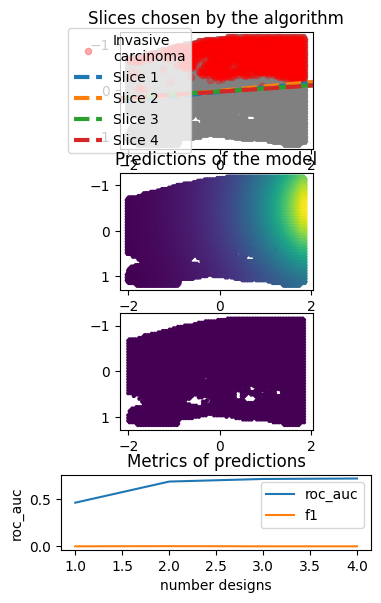

In [6]:
# continuous optim with continuous indicator

# data
datamodule = dutils.Prostate_cancer_2d()
X,y = datamodule.get_data(processed=True)
slice_radius_pixel = 2
slice_radius = slice_radius_pixel / datamodule.norm_params['std_both']
tissue = dutils.Tissue_cont_indicator(X, y, 
                                      slice_radius = slice_radius,
                                      n_plateau=2)
torch.autograd.set_detect_anomaly(True)

# distributions
r_prior = torch.tensor([1.0])
mu = torch.tensor([torch.log(r_prior),0.,0.])
std = torch.tensor([1.,10.,10.])
prior = distr.Circle_prior_log(mu=mu,log_std=torch.log(std))
predictive = distr.Circle_predictive(with_weights=True)

# optimization
eig_method = mutils.eig_PCE
eig_optim_method = mutils.eig_cont_optim
n_designs = 4
optim_args = {}

experiment, thetas_MAP, metric_values, metric_names = mutils.OED_fit(
    tissue, prior,predictive,n_designs,eig_method,eig_optim_method,
    n_steps_optim=500, n_steps_varinf=500,print_every=50,
    optim_args=optim_args
)

------- Iteration 1/4 -------
1/500, eig: 1.1693817377090454


/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


51/500, eig: 1.104995846748352
101/500, eig: 1.3459384441375732
151/500, eig: 1.2229150533676147
201/500, eig: 1.1316242218017578
251/500, eig: 1.1453831195831299
301/500, eig: 1.0860531330108643
351/500, eig: 1.2144932746887207
401/500, eig: 1.258599877357483
451/500, eig: 1.1697717905044556
Executed design; best_eig: 1.2232887744903564, design_params: {'alpha': tensor(-0.1627, grad_fn=<AddBackward0>), 'y_intercept': tensor(0.0396, grad_fn=<AddBackward0>)}
1/200: elbo = -276.043304
51/200: elbo = -75.388718
101/200: elbo = -80.720245
151/200: elbo = -79.831154
thetas_MAP: tensor([[0.4989, 0.1953, 0.0492]], grad_fn=<ViewBackward0>)
0.6177059


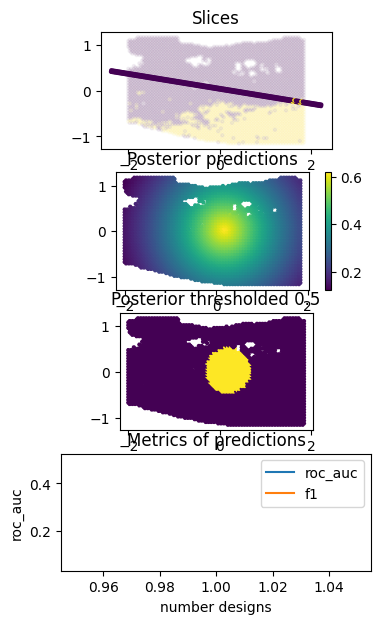

------- Iteration 2/4 -------
1/500, eig: 0.6918075680732727


/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


51/500, eig: 0.6372588872909546
101/500, eig: 0.6416351199150085
151/500, eig: 0.5771607160568237
201/500, eig: 0.5924059748649597
251/500, eig: 0.7540878057479858
301/500, eig: 0.6326587200164795
351/500, eig: 0.6838216185569763
401/500, eig: 0.663990318775177
451/500, eig: 0.6934186816215515
Executed design; best_eig: 0.6729745268821716, design_params: {'alpha': tensor(-0.2394, grad_fn=<AddBackward0>), 'y_intercept': tensor(0.0489, grad_fn=<AddBackward0>)}
1/200: elbo = -173.388885
51/200: elbo = -155.836105
101/200: elbo = -106.442551
151/200: elbo = -122.109444
thetas_MAP: tensor([[-0.2706,  1.4720,  0.0203]], grad_fn=<ViewBackward0>)
0.43081644


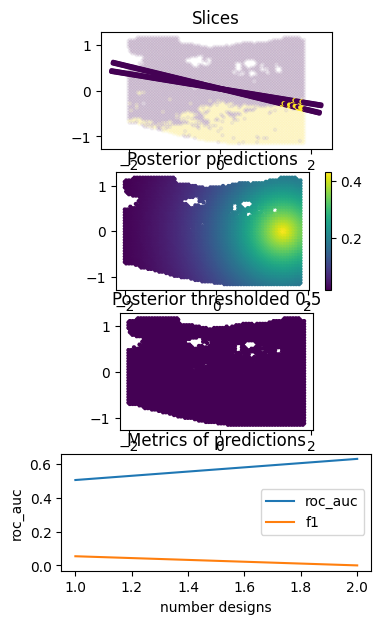

------- Iteration 3/4 -------
1/500, eig: 1.7164981365203857


/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


51/500, eig: 1.9035460948944092
101/500, eig: 1.9271550178527832
151/500, eig: 1.704495906829834
201/500, eig: 1.7890739440917969
251/500, eig: 1.827973484992981
301/500, eig: 1.8853377103805542
351/500, eig: 1.7920047044754028
401/500, eig: 1.8824046850204468
451/500, eig: 1.754425048828125
Executed design; best_eig: 1.8459484577178955, design_params: {'alpha': tensor(-0.3750, grad_fn=<AddBackward0>), 'y_intercept': tensor(0.0907, grad_fn=<AddBackward0>)}
1/200: elbo = -167.532318
51/200: elbo = -124.870827
101/200: elbo = -105.200783
151/200: elbo = -97.657692
thetas_MAP: tensor([[-0.3133,  2.6920, -0.8510]], grad_fn=<ViewBackward0>)
0.2379229


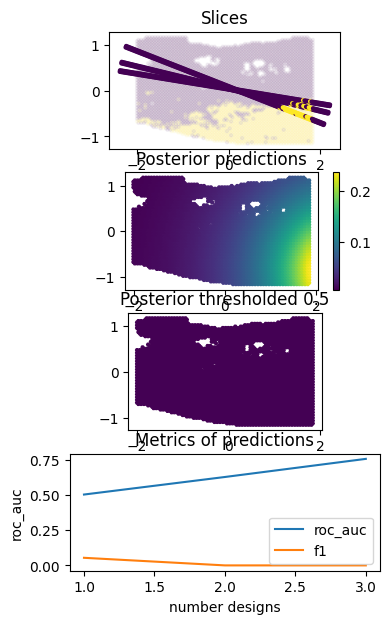

------- Iteration 4/4 -------
1/500, eig: 1.365605354309082


/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4358: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/Users/user1/miniconda3/envs/py39/lib/python3.9/site-packages/torch/nn/functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


51/500, eig: 1.204001545906067
101/500, eig: 1.4250733852386475
151/500, eig: 1.4543089866638184
201/500, eig: 1.540478229522705
251/500, eig: 1.5534396171569824
301/500, eig: 1.4373900890350342
351/500, eig: 1.490004539489746
401/500, eig: 1.5159270763397217
451/500, eig: 1.6528427600860596
Executed design; best_eig: 1.4976303577423096, design_params: {'alpha': tensor(-0.9288, grad_fn=<AddBackward0>), 'y_intercept': tensor(-0.1135, grad_fn=<AddBackward0>)}
1/200: elbo = -132.233154
51/200: elbo = -122.582909
101/200: elbo = -119.252998
151/200: elbo = -117.823273
thetas_MAP: tensor([[-0.4724,  1.9406, -0.3109]], grad_fn=<ViewBackward0>)
0.36007085


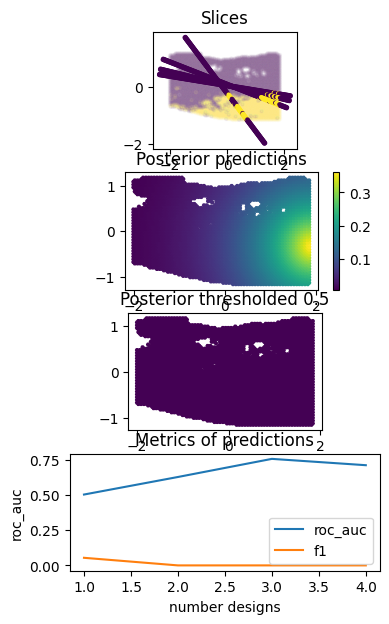

In [15]:
# continuous optim with completely continuous tissue

# data
datamodule = dutils.Prostate_cancer_2d()
X,y = datamodule.get_data()
tissue = dutils.Tissue_continuous(X, y, slice_radius = 1)
torch.autograd.set_detect_anomaly(True)

# distributions
r_prior = torch.tensor([3.0])
mu = torch.tensor([torch.log(r_prior),0.,0.])
std = torch.tensor([1.,10.,10.])
prior = distr.Circle_prior_log(mu=mu,log_std=torch.log(std))
predictive = distr.Circle_predictive()

# optimization
eig_calc_method = mutils.eig_PCE
eig_optim_method = mutils.eig_cont_optim
n_designs = 4
optim_args = {
    'alpha': ('minmax', -torch.pi, torch.pi),
    'y_intercept': ('minmax', -1, 1),
}

# execution
experiment, thetas_MAP, metric_values, metric_names = mutils.OED_fit(
    tissue, prior,predictive,n_designs,
    eig_calc_method, eig_optim_method,
    optim_args=optim_args
)